## Computing the affect of GDP on Life Satisfaction of different countries : Analyze the trend

In [68]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

### Loading Life Satisfaction Data Set

In [69]:
import pandas as pd

# Download CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
datapath = "datasets/lifesat/"

oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.head(2)

,"﻿""LOCATION""",Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


#### Pivoting the data frame by country 

In [70]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [71]:
oecd_bli.columns

Index([u'Air pollution', u'Assault rate', u'Consultation on rule-making',
       u'Dwellings without basic facilities', u'Educational attainment',
       u'Employees working very long hours', u'Employment rate',
       u'Homicide rate', u'Household net adjusted disposable income',
       u'Household net financial wealth', u'Housing expenditure',
       u'Job security', u'Life expectancy', u'Life satisfaction',
       u'Long-term unemployment rate', u'Personal earnings',
       u'Quality of support network', u'Rooms per person',
       u'Self-reported health', u'Student skills',
       u'Time devoted to leisure and personal care', u'Voter turnout',
       u'Water quality', u'Years in education'],
      dtype='object', name=u'Indicator')

In [72]:
oecd_bli['Life satisfaction'].head(5)

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

### Loading & Preparing GDP data set

In [73]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [74]:
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


#### Joining the the above two data sets LS + GDP

In [75]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace="True")
full_country_stats.head(3)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0


In [76]:
# values at a particular index
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

Indicator
GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [77]:
full_country_stats.shape

(36, 30)

In [78]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
sample_data.head()

Indicator,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [79]:
# we will use missing data as Test data to verify our answers that we prepare form training data i.e. sample data

missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]
missing_data

Indicator,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


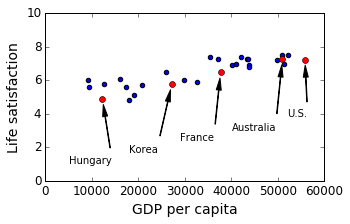

In [80]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))

## Normalizing the Plot axis (reducing the spread acorss both the axis)
plt.axis([0, 60000, 0, 10])     

position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

In [81]:
print ('Indexes: ', (list(position_text.keys())))
sample_data.loc[list(position_text.keys())]

Indexes:  [u'Australia', u'Hungary', u'Korea', u'United States', u'France']


Indicator,GDP per capita,Life satisfaction
Country,,
Australia,50961.865,7.3
Hungary,12239.894,4.9
Korea,27195.197,5.8
United States,55805.204,7.2
France,37675.006,6.5


## Linear Regression Model using Sklearn

##### Training the model

In [82]:
# np.c_ converts a series into an array 
from sklearn import linear_model

lin1 = linear_model.LinearRegression()

Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print (t0, t1)
print (lin1.intercept_[0])
print (lin1.coef_[0][0])


4.85305280027 4.91154458916e-05
4.85305280027
4.91154458916e-05


#### Ploting the training data

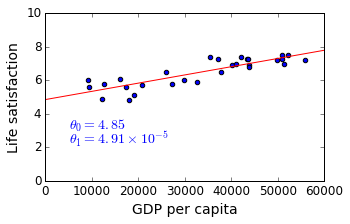

In [84]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

plt.plot(X, t0 + t1*X, "r")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

##### Predicitng the value for the country 'Cyprus'

In [127]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
print (cyprus_predicted_life_satisfaction)
#full_country_stats.index
#print (full_country_stats.loc["Cyprus"]["Life satisfaction"])
#gdp_per_capita.index

22587.49
5.96244744319


##### Plotting the above predicted value for 'Cyprus'

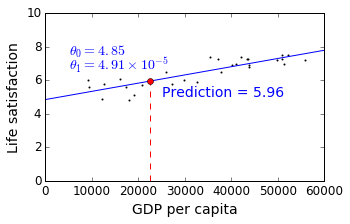

In [86]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.show()

In [129]:
testData = missing_data
testData_keys = (testData.index.values).tolist()
testData_keys

['Brazil',
 'Mexico',
 'Chile',
 'Czech Republic',
 'Norway',
 'Switzerland',
 'Luxembourg']

##### Creating life staisfaction prediction function

In [188]:
# np.c_ converts a series into an array 
def predict_Life_Satisfaction (key):
    lin1 = linear_model.LinearRegression()
    Xsample = np.c_[sample_data["GDP per capita"]]
    ysample = np.c_[sample_data["Life satisfaction"]]
    lin1.fit(Xsample, ysample)
    t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
    country_gdp_per_capita = gdp_per_capita.loc[key]["GDP per capita"]
    predicted_life_satisfaction = lin1.predict(country_gdp_per_capita)[0][0]
    return predicted_life_satisfaction

##### Testing the prediction fuction on a small dataset (missing value data set created above from full country)

In [135]:
# Predicitng values for the missing data
predicted_life_satisfaction_dict = {}
for key in testData_keys:
    predicted_life_satisfaction_dict[key] = (predict_Life_Satisfaction(key))
small_test_pred = pd.DataFrame(predicted_life_satisfaction_dict.items())
small_test_pred.columns = ['Country','Predicted Life Satisfaction']
small_test_pred

,Country,Predicted Life Satisfaction
0,Brazil,5.278884
1,Czech Republic,5.700634
2,Mexico,5.295548
3,Luxembourg,9.862538
4,Chile,5.508297
5,Switzerland,8.815457
6,Norway,8.527974


##### Adding orginal life staisfactionvalues along with predicted values

In [136]:
small_test_pred = pd.merge(left=missing_data, right=small_test_pred, left_index=True, right_on='Country')
small_test_pred.sort_values(by="Life satisfaction", inplace="True")
small_test_pred

Indicator,GDP per capita,Life satisfaction,Country,Predicted Life Satisfaction
1,17256.918,6.5,Czech Republic,5.700634
2,9009.280,6.7,Mexico,5.295548
4,13340.905,6.7,Chile,5.508297
3,101994.093,6.9,Luxembourg,9.862538
0,8669.998,7.0,Brazil,5.278884
6,74822.106,7.4,Norway,8.527974
5,80675.308,7.5,Switzerland,8.815457


##### Calculating accuracy results

In [174]:
from sklearn.metrics import mean_squared_error, scorer
y_true = []
y_pred = []
y_true = small_test_pred['Life satisfaction'].tolist()
y_pred = small_test_pred['Predicted Life Satisfaction'].tolist()
print ('RMSE : ',mean_squared_error(y_true, y_pred))


RMSE :  2.68189324875


In [91]:
#convert columns into key-value dictioanry pair
missing_predicted_dict = dict(zip(missing_predicted['Country'], missing_predicted['Predicted Life Satisfaction']))
missing_predicted_dict

{'Brazil': 5.2788836179155849,
 'Chile': 5.5082972979387099,
 'Czech Republic': 5.7006340225509522,
 'Luxembourg': 9.862538156269208,
 'Mexico': 5.2955476046285739,
 'Norway': 8.5279738990038609,
 'Switzerland': 8.8154565251273773}

#### Now Calculating Predicition values for training data

In [151]:
trainingData = (full_country_stats.index.values).tolist()

pred_trainData_life_satisfaction_dict = {}
for key in trainingData:
    pred_trainData_life_satisfaction_dict[key] = (predict_Life_Satisfaction(key))
    
train_pred = pd.DataFrame(pred_trainData_life_satisfaction_dict.items())
train_pred.columns = ['Country','Predicted Life Satisfaction']
train_pred = pd.merge(left=full_country_stats, right=train_pred, left_index=True, right_on='Country')
train_pred.sort_values(by="Life satisfaction", inplace="True")
train_pred = train_pred[['GDP per capita','Country','Life satisfaction','Predicted Life Satisfaction']]
train_pred.head(10)

Indicator,GDP per capita,Country,Life satisfaction,Predicted Life Satisfaction
34,18064.288,Greece,4.8,5.740288
25,12239.894,Hungary,4.9,5.454221
29,19121.592,Portugal,5.1,5.792218
1,9437.372,Turkey,5.6,5.316574
30,17288.083,Estonia,5.6,5.702165
13,20732.482,Slovenia,5.7,5.871338
20,12495.334,Poland,5.8,5.466767
11,27195.197,Korea,5.8,6.188757
35,32485.545,Japan,5.9,6.448595
2,29866.581,Italy,6.0,6.319963


##### Plotting the above predicted results here

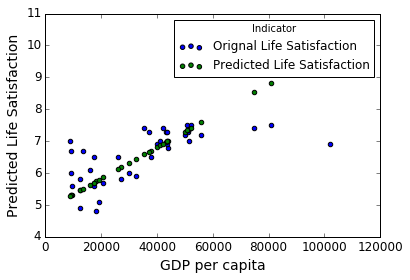

In [167]:
ax = train_pred.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                     color='Blue', label='Orignal Life Satisfaction')
train_pred.plot(kind='scatter', x="GDP per capita", y='Predicted Life Satisfaction',color='Green', 
                label='Predicted Life Satisfaction', ax=ax)
#ax.axis([0, 60000, 0, 10])

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1148ba8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1148c8810>,
 'fliers': [<matplotlib.lines.Line2D at 0x1148d49d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1148ba550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1148baad0>,
  <matplotlib.lines.Line2D at 0x1148dfc90>]}

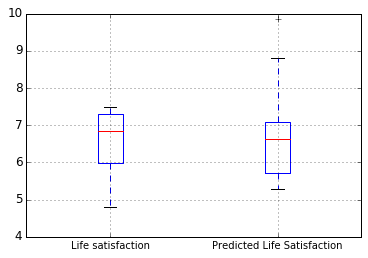

In [166]:
train_pred.boxplot(column =['Life satisfaction','Predicted Life Satisfaction'])

In [176]:
y_true = []
y_pred = []
y_true = train_pred['Life satisfaction'].tolist()
y_pred = train_pred['Predicted Life Satisfaction'].tolist()
print ('RMSE  : ',mean_squared_error(y_true, y_pred))



RMSE  :  0.667083680998


### Apply Training model on the Larger test data

In [177]:
trainingCountries = set(full_country_stats.index)
AllCountries = set(gdp_per_capita.index)
testCountries = list(AllCountries - trainingCountries)


# Predicitng values for the missing data
for key in testCountries[:30]:
    predicted_life_satisfaction_dict[key] = (linModel(key))

test_data_pred = pd.DataFrame(predicted_life_satisfaction_dict.items())

test_data_pred.columns = ['Country','Predicted Life Satisfaction']
test_data_pred = pd.merge(left=gdp_per_capita, right=test_data_pred, left_index=True, right_on='Country')
test_data_pred = test_data_pred[['GDP per capita','Country','Predicted Life Satisfaction']]

In [178]:
# Results for test Data Set 
test_data_pred.head(10)

,GDP per capita,Country,Predicted Life Satisfaction
9,13588.846,Argentina,5.520475
3,23902.805,The Bahamas,6.027050
21,4841.735,Belize,5.090857
10,2886.231,Bolivia,4.994811
18,4088.212,Bosnia and Herzegovina,5.053847
0,8669.998,Brazil,5.278884
12,614.500,Burkina Faso,4.883234
29,3038.511,Cabo Verde,5.002291
33,1168.036,Cambodia,4.910421
11,1232.423,Cameroon,4.913584


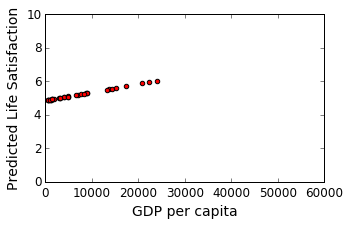

In [179]:
test_data_pred.plot(kind='scatter', x="GDP per capita", y='Predicted Life Satisfaction', figsize=(5,3),color='red')
plt.axis([0, 60000, 0, 10])
plt.show()

### Polynomial Regression Method

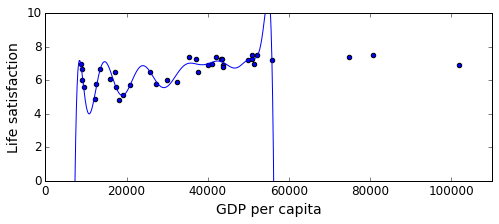

In [187]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.show()

PolynomialFeatures(degree=30, include_bias=False, interaction_only=False)


StandardScaler(copy=True, with_mean=True, with_std=True)

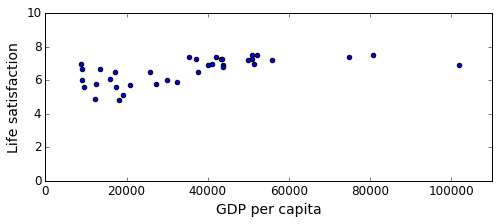

In [194]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
print (poly)
scaler = preprocessing.StandardScaler()
scaler

In [ ]:
print (gdp_per_capita.loc['Cyprus'])